In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
dataset = pd.read_csv('dataset.csv')

In [3]:
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [5]:
dataset.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [6]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [7]:
dataset.tail()

,User ID,Gender,Age,EstimatedSalary,Purchased
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0
399,15594041,Female,49,36000,1


In [8]:
X = dataset.iloc[:,[2,3]].values

In [9]:
X

array([[    19,  19000],
       [    35,  20000],
       [    26,  43000],
       [    27,  57000],
       [    19,  76000],
       [    27,  58000],
       [    27,  84000],
       [    32, 150000],
       [    25,  33000],
       [    35,  65000],
       [    26,  80000],
       [    26,  52000],
       [    20,  86000],
       [    32,  18000],
       [    18,  82000],
       [    29,  80000],
       [    47,  25000],
       [    45,  26000],
       [    46,  28000],
       [    48,  29000],
       [    45,  22000],
       [    47,  49000],
       [    48,  41000],
       [    45,  22000],
       [    46,  23000],
       [    47,  20000],
       [    49,  28000],
       [    47,  30000],
       [    29,  43000],
       [    31,  18000],
       [    31,  74000],
       [    27, 137000],
       [    21,  16000],
       [    28,  44000],
       [    27,  90000],
       [    35,  27000],
       [    33,  28000],
       [    30,  49000],
       [    26,  72000],
       [    27,  31000],


In [11]:
y =dataset.iloc[:,4].values
y

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,

In [12]:
X.shape

(400, 2)

In [13]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2, random_state=20)

In [14]:
X_train.shape, X_test.shape

((320, 2), (80, 2))

In [15]:
#fit transform generate the coef not necessary to again for the test 

In [16]:
X_train

array([[    29,  83000],
       [    30, 116000],
       [    35,  50000],
       [    47, 107000],
       [    26,  84000],
       [    28,  32000],
       [    32, 100000],
       [    53,  82000],
       [    22,  81000],
       [    19,  19000],
       [    33,  31000],
       [    48,  35000],
       [    35,  27000],
       [    47,  23000],
       [    43, 129000],
       [    20,  36000],
       [    39,  75000],
       [    38,  50000],
       [    31,  74000],
       [    34,  43000],
       [    36, 118000],
       [    52,  21000],
       [    35,  23000],
       [    29,  61000],
       [    47,  25000],
       [    35,  88000],
       [    48, 131000],
       [    31,  18000],
       [    23,  66000],
       [    31,  89000],
       [    20,  23000],
       [    25,  33000],
       [    45,  22000],
       [    46,  23000],
       [    21,  16000],
       [    41,  30000],
       [    46,  32000],
       [    37,  55000],
       [    49,  89000],
       [    26, 118000],


In [17]:
X_test

array([[    26,  80000],
       [    44, 139000],
       [    37,  80000],
       [    30,  79000],
       [    27,  54000],
       [    37,  80000],
       [    23,  28000],
       [    54, 108000],
       [    40,  57000],
       [    36, 125000],
       [    46,  79000],
       [    32,  18000],
       [    52, 150000],
       [    47,  47000],
       [    32,  86000],
       [    29,  43000],
       [    27,  90000],
       [    45,  26000],
       [    23,  48000],
       [    57, 122000],
       [    35,  65000],
       [    39,  42000],
       [    22,  55000],
       [    26,  15000],
       [    42,  54000],
       [    32, 150000],
       [    38,  55000],
       [    35,  73000],
       [    49,  28000],
       [    42,  90000],
       [    34,  72000],
       [    32, 117000],
       [    31,  66000],
       [    38, 113000],
       [    38,  80000],
       [    39, 134000],
       [    30,  17000],
       [    39,  71000],
       [    40, 107000],
       [    46,  59000],


In [18]:
#feature scaling 
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [19]:
X_train

array([[-0.80276277,  0.44295604],
       [-0.70800656,  1.43671337],
       [-0.23422551, -0.5508013 ],
       [ 0.90284902,  1.16568865],
       [-1.0870314 ,  0.4730699 ],
       [-0.89751898, -1.09285075],
       [-0.51849414,  0.95489164],
       [ 1.47138628,  0.41284218],
       [-1.46605624,  0.38272832],
       [-1.75032487, -1.48433091],
       [-0.42373793, -1.12296461],
       [ 0.99760523, -1.00250917],
       [-0.23422551, -1.24342004],
       [ 0.90284902, -1.36387548],
       [ 0.52382418,  1.82819354],
       [-1.65556866, -0.97239532],
       [ 0.14479933,  0.20204517],
       [ 0.05004312, -0.5508013 ],
       [-0.61325035,  0.17193131],
       [-0.32898172, -0.76159831],
       [-0.1394693 ,  1.49694109],
       [ 1.37663007, -1.42410319],
       [-0.23422551, -1.36387548],
       [-0.80276277, -0.21954885],
       [ 0.90284902, -1.30364776],
       [-0.23422551,  0.59352533],
       [ 0.99760523,  1.88842125],
       [-0.61325035, -1.51444477],
       [-1.37130003,

In [20]:
y_train

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,

In [21]:
y_test

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0], dtype=int64)

In [67]:
X_test

array([[-1.0870314 ,  0.35261446],
       [ 0.61858039,  2.12933212],
       [-0.04471309,  0.35261446],
       [-0.70800656,  0.3225006 ],
       [-0.99227519, -0.43034586],
       [-0.04471309,  0.35261446],
       [-1.37130003, -1.21330618],
       [ 1.56614249,  1.1958025 ],
       [ 0.23955554, -0.34000428],
       [-0.1394693 ,  1.7077381 ],
       [ 0.80809281,  0.3225006 ],
       [-0.51849414, -1.51444477],
       [ 1.37663007,  2.46058457],
       [ 0.90284902, -0.64114287],
       [-0.51849414,  0.53329761],
       [-0.80276277, -0.76159831],
       [-0.99227519,  0.65375305],
       [ 0.7133366 , -1.2735339 ],
       [-1.37130003, -0.61102901],
       [ 1.85041112,  1.61739652],
       [-0.23422551, -0.09909342],
       [ 0.14479933, -0.79171216],
       [-1.46605624, -0.400232  ],
       [-1.0870314 , -1.60478635],
       [ 0.42906797, -0.43034586],
       [-0.51849414,  2.46058457],
       [ 0.05004312, -0.400232  ],
       [-0.23422551,  0.14181745],
       [ 1.09236144,

In [68]:
clf = LogisticRegression()
clf.fit(X_train,y_train)

LogisticRegression()

In [69]:
y_pred = clf.predict(X_test)
print('Accuracy Score for test : ',accuracy_score(y_test,y_pred))

Accuracy Score for test :  0.8625


In [58]:
y_pred

array([1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0], dtype=int64)

In [71]:
#confusionmatrix
confusion_matrix(y_test,y_pred)

array([[43,  2],
       [ 9, 26]], dtype=int64)

In [72]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89        45
           1       0.93      0.74      0.83        35

    accuracy                           0.86        80
   macro avg       0.88      0.85      0.86        80
weighted avg       0.87      0.86      0.86        80



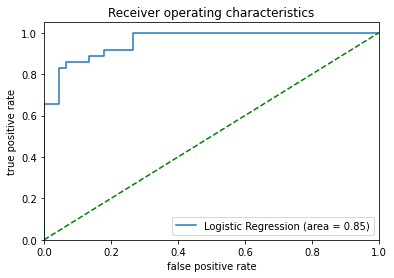

In [82]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test,y_pred)
fpr, tpr, threshold = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label ='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0,1],[0,1],'g--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('Receiver operating characteristics')
plt.legend(loc = 'lower right')
plt.savefig('Log_ROC')
plt.show()

In [5]:
print('Hello')

Hello


In [6]:
a =[1,2]
a

[1, 2]